Import libraries

In [124]:
# Data processing
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Algorithm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

Getting the Data

In [125]:
train = pd.read_csv('../input/train.csv')
test =  pd.read_csv('../input/test.csv')
all=[train,test]

Data Exploration/Analysis

In [126]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [128]:
train.shape #the train has 891 examples and 11 features + the target variable (survived)

(891, 12)

In [129]:
test.shape

(418, 11)

In [130]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [131]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that 38% out of the train survived the Titanic. 
We can also see that the passenger ages range from 0.4 to 80. 

The features with a short description
    
survival:   Survival
PassengerId: Unique Id of a passenger.
pclass: Ticket class    
sex:    Sex 
Age:    Age in years    
sibsp:  Siblings / spouses aboard the Titanic  
parch:  Parents / children aboard the Titanic  
ticket: Ticket number   
fare:   Passenger fare  
cabin:  Cabin number    
embarked:   Port of Embarkation

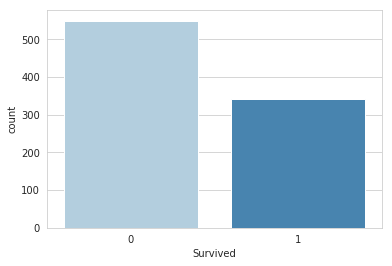

In [132]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='Blues')

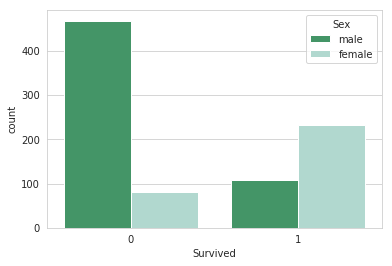

In [133]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='BuGn_r')

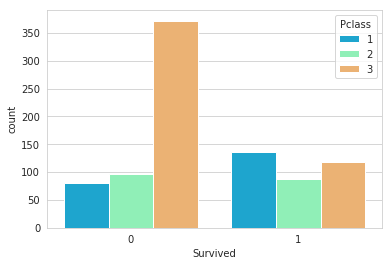

In [134]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


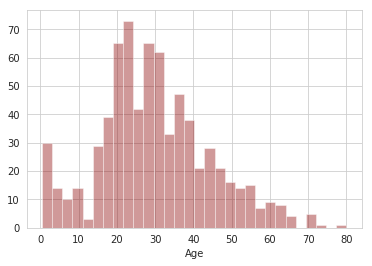

In [135]:
sns.distplot(train['Age'],color='darkred',bins=30,kde=False);

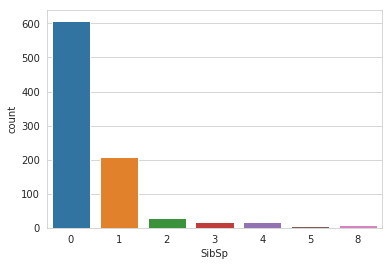

In [136]:
sns.countplot(x='SibSp',data=train);

Missing Data

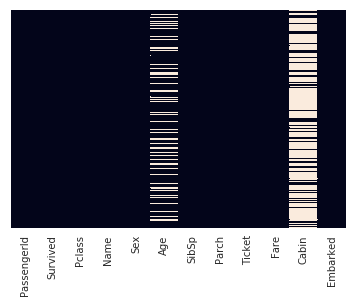

In [137]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

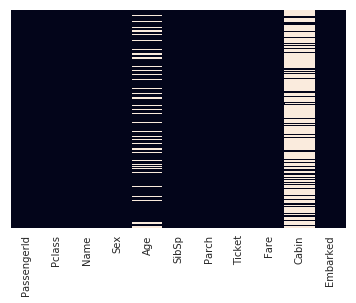

In [138]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [139]:
print('Train columns with null values:\n', train.isnull().sum())
print("*"*40)

print('Test/Validation columns with null values:\n', test.isnull().sum())
print("*"*20)

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
****************************************
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
********************


Cabin

In [140]:
train = train.drop(['Cabin'],axis=1)
test=test.drop(['Cabin'],axis=1)
all=[train,test]

In [141]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Embarked

In [142]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [143]:
print(train['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [144]:
train["Embarked"]=train['Embarked'].fillna('S')

In [145]:
train['Embarked'].isnull().any()

False

In [146]:
train['Embarked_cat'] = pd.factorize(train['Embarked'])[0]
test['Embarked_cat'] = pd.factorize(test['Embarked'])[0]
all=[train,test]

In [147]:
train = train.drop(['Embarked'],axis=1)
test=test.drop(['Embarked'],axis=1)
all=[train,test]

In [148]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_cat
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,2


In [149]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,1


Sex

In [150]:
# instead pd.factorize
train.loc[train['Sex']=="male","Sex"]=0
train.loc[train['Sex']=="female","Sex"]=1
test.loc[test['Sex']=="male","Sex"]=0
test.loc[test['Sex']=="female","Sex"]=1

all=[train,test]

In [151]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [152]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_cat
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,1


In [153]:
features = ["Age", "Survived","Fare", "Pclass", "SibSp", "Parch"]

print('MALES')

print(train[train.Sex == 0][features].describe())
print('_'*75)

print("FEMALES")
print(train[train.Sex == 1][features].describe())


MALES
              Age    Survived     ...           SibSp       Parch
count  453.000000  577.000000     ...      577.000000  577.000000
mean    30.726645    0.188908     ...        0.429809    0.235702
std     14.678201    0.391775     ...        1.061811    0.612294
min      0.420000    0.000000     ...        0.000000    0.000000
25%     21.000000    0.000000     ...        0.000000    0.000000
50%     29.000000    0.000000     ...        0.000000    0.000000
75%     39.000000    0.000000     ...        0.000000    0.000000
max     80.000000    1.000000     ...        8.000000    5.000000

[8 rows x 6 columns]
___________________________________________________________________________
FEMALES
              Age    Survived     ...           SibSp       Parch
count  261.000000  314.000000     ...      314.000000  314.000000
mean    27.915709    0.742038     ...        0.694268    0.649682
std     14.110146    0.438211     ...        1.156520    1.022846
min      0.750000    0.000000 

In [154]:
print( train[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean() )

   Sex  Survived
0    0  0.188908
1    1  0.742038


Age

In [155]:
train['Age'].isnull().sum()

177

In [156]:
train['Age']=train['Age'].fillna(train['Age'].mean())
test['Age']=test['Age'].fillna(test['Age'].mean())
all=[train,test]

In [157]:
train['Age'].isnull().sum()

0

In [158]:
test['Age'].isnull().sum()

0

Text(0, 0.5, 'Frequency')

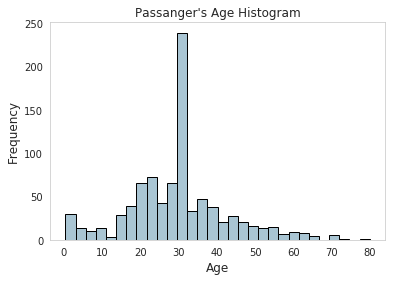

In [159]:
fig, ax = plt.subplots()

train['Age'].hist(bins=30,color='#A9C5D3', edgecolor='black',grid=False)

ax.set_title('Passanger\'s Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [160]:
train['Age_group'] = pd.cut(train['Age'], 5)
train[['Age_group', 'Survived']].groupby(['Age_group'],as_index=False).mean().sort_values(by='Age_group', ascending=True)

,Age_group,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [161]:
for dataset in all:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_cat,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,0,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,1,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,0,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,0,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,0,"(32.252, 48.168]"
5,6,0,3,"Moran, Mr. James",0,1.0,0,0,330877,8.4583,2,"(16.336, 32.252]"
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,0,"(48.168, 64.084]"
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,0,"(0.34, 16.336]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1.0,0,2,347742,11.1333,0,"(16.336, 32.252]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,30.0708,1,"(0.34, 16.336]"


In [162]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_cat
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,7.8292,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2.0,1,0,363272,7.0000,1
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,9.6875,0
3,895,3,"Wirz, Mr. Albert",0,1.0,0,0,315154,8.6625,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,12.2875,1


In [163]:
train = train.drop(['Age_group'], axis=1)
all = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,0


FamilySize


In [164]:
for dataset in all:
    dataset['Family_size']=dataset['SibSp']+dataset['Parch']+1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_cat,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,0,1


In [165]:
print(train[['Family_size','Survived']].groupby(['Family_size'],as_index=False).mean())

   Family_size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000


In [166]:
for dataset in all:
    dataset['Is_alone']=1
    dataset['Is_alone'].loc[dataset['Family_size']>1]=0
print(train[['Is_alone','Survived']].groupby(['Is_alone'],as_index=False).mean())

   Is_alone  Survived
0         0  0.505650
1         1  0.303538


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [167]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_cat,Family_size,Is_alone
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,0,2,0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,0,1,1


In [168]:
feature_drop=['SibSp','Parch','Family_size']
train=train.drop(feature_drop,axis=1)
test=test.drop(feature_drop,axis=1)
all=[train,test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked_cat,Is_alone
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,PC 17599,71.2833,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,113803,53.1000,0,0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,373450,8.0500,0,1


In [169]:
train = train.drop(['Name', 'PassengerId','Fare','Ticket'], axis=1)
test = test.drop(['Name','Fare','Ticket'], axis=1)
all = [train, test]
train.shape, test.shape

((891, 6), (418, 6))

In [170]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked_cat', 'Is_alone'], dtype='object')

In [171]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Embarked_cat', 'Is_alone'], dtype='object')

In [172]:
train.head()

,Survived,Pclass,Sex,Age,Embarked_cat,Is_alone
0,0,3,0,1.0,0,0
1,1,1,1,2.0,1,0
2,1,3,1,1.0,0,1
3,1,1,1,2.0,0,0
4,0,3,0,2.0,0,1


In [173]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked_cat,Is_alone
0,892,3,0,2.0,0,1
1,893,3,1,2.0,1,0
2,894,2,0,3.0,0,1
3,895,3,0,1.0,1,1
4,896,3,1,1.0,1,0


Logistic regression

In [174]:
X_train=train.drop('Survived',axis=1)
Y_train=train['Survived']
X_test=test.drop('PassengerId',axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 5), (891,), (418, 5))

In [175]:
log=LogisticRegression()
log.fit(X_train, Y_train)
acc_log=log.score(X_train,Y_train)

print('Logistic Regression accuracy is=' +str(round(acc_log,3)))

Logistic Regression accuracy is=0.787


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
